# 音频变换样例库

[![下载Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook.svg)](https://obs.dualstack.cn-north-4.myhuaweicloud.com/mindspore-website/notebook/master/docs/api_python/samples/dataset/audio_gallery.ipynb)&emsp;
[![查看源文件](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source.svg)](https://gitee.com/mindspore/mindspore/blob/master/docs/api/api_python/samples/dataset/audio_gallery.ipynb)

此指南展示了[mindpore.dataset.audio](https://www.mindspore.cn/docs/zh-CN/master/api_python/mindspore.dataset.transforms.html#%E9%9F%B3%E9%A2%91)模块中各种变换的用法。

## 环境准备

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from IPython.display import Audio
from download import download

import mindspore.dataset as ds
import mindspore.dataset.audio as audio

ds.config.set_seed(5)

# cication: LibriSpeech http://www.openslr.org/12
url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/84-121123-0000.wav"
download(url, './84-121123-0000.wav', replace=True)
wav_file = "84-121123-0000.wav"

def plot_waveform(waveform, sr, title="Waveform"):
    if waveform.ndim == 1:
        waveform = waveform[np.newaxis, :]
    num_channels, num_frames = waveform.shape
    time_axis = np.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    figure.suptitle(title)
    plt.show(block=False)


def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


def plot_fbank(fbank, title=None):
    _, axs = plt.subplots(1, 1)
    axs.set_title(title or "Filter bank")
    axs.imshow(fbank, aspect="auto")
    axs.set_ylabel("frequency bin")
    axs.set_xlabel("mel bin")
    plt.show(block=False)



file_sizes: 100%|███████████████████████████| 67.0k/67.0k [00:00<00:00, 720kB/s]
Successfully downloaded file to ./84-121123-0000.wav


## Spectrogram

从音频信号创建其频谱，可以使用[mindspore.dataset.audio.Spectrogram](https://mindspore.cn/docs/zh-CN/master/api_python/dataset_audio/mindspore.dataset.audio.Spectrogram.html#mindspore.dataset.audio.Spectrogram)。

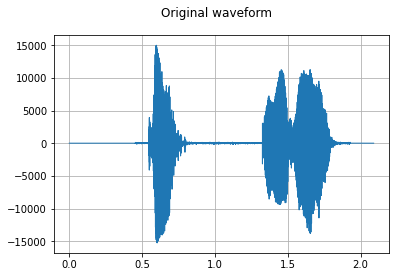

In [2]:
sample_rate, waveform = wavfile.read(wav_file)

plot_waveform(waveform, sample_rate, title="Original waveform")
Audio(waveform, rate=sample_rate)

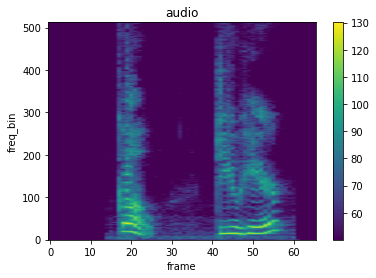

In [3]:
# Perform transform
n_fft = 1024
win_length = None
hop_length = 512

# Define transform
spectrogram = audio.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode=audio.BorderType.REFLECT,
    power=2.0,
)

spec = spectrogram(waveform)
plot_spectrogram(spec, title="audio")

## GriffinLim

从线性幅度频谱图恢复信号波形, 可以使用 [mindspore.dataset.audio.GriffinLim](https://mindspore.cn/docs/zh-CN/master/api_python/dataset_audio/mindspore.dataset.audio.GriffinLim.html#mindspore.dataset.audio.GriffinLim) 。

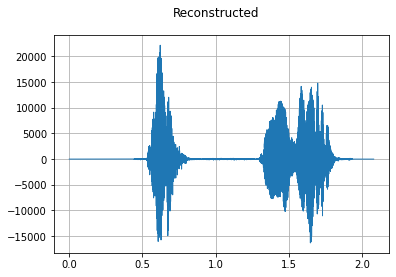

In [4]:
n_fft = 1024
win_length = None
hop_length = 512

spec = audio.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
)(waveform)

griffin_lim = audio.GriffinLim(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
)

reconstructed_waveform = griffin_lim(spec)

plot_waveform(reconstructed_waveform, sample_rate, title="Reconstructed")
Audio(reconstructed_waveform, rate=sample_rate)

## Mel Filter Bank

[mindspore.dataset.audio.melscale_fbanks](https://mindspore.cn/docs/zh-CN/master/api_python/dataset_audio/mindspore.dataset.audio.melscale_fbanks.html#mindspore.dataset.audio.melscale_fbanks) 可以创建频率变换矩阵。

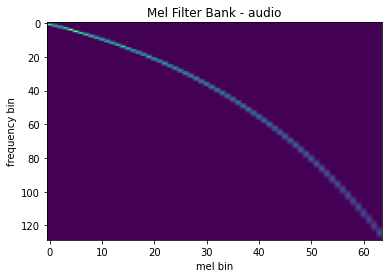

In [5]:
n_fft = 256
n_mels = 64
sample_rate = 6000

mel_filters = audio.melscale_fbanks(
    int(n_fft // 2 + 1),
    n_mels=n_mels,
    f_min=0.0,
    f_max=sample_rate / 2.0,
    sample_rate=sample_rate,
    norm=audio.NormType.SLANEY,
)

plot_fbank(mel_filters, "Mel Filter Bank - audio")

## MelSpectrogram

[mindspore.dataset.audio.MelSpectrogram](https://mindspore.cn/docs/zh-CN/master/api_python/dataset_audio/mindspore.dataset.audio.MelSpectrogram.html#mindspore.dataset.audio.MelSpectrogram) 可以计算原始音频信号的梅尔频谱。

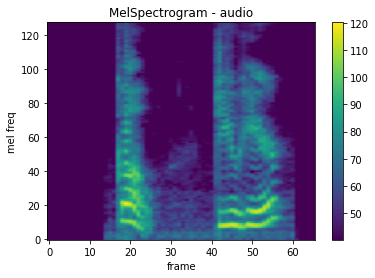

In [6]:
n_fft = 1024
win_length = None
hop_length = 512
n_mels = 128

mel_spectrogram = audio.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode=audio.BorderType.REFLECT,
    power=2.0,
    norm=audio.NormType.SLANEY,
    onesided=True,
    n_mels=n_mels,
    mel_scale=audio.MelType.HTK,
)

melspec = mel_spectrogram(waveform)
plot_spectrogram(melspec, title="MelSpectrogram - audio", ylabel="mel freq")

## MFCC

[mindspore.dataset.audio.MFCC](https://mindspore.cn/docs/zh-CN/master/api_python/dataset_audio/mindspore.dataset.audio.MFCC.html#mindspore.dataset.audio.MFCC) 可以计算音频信号的梅尔频率倒谱系数。

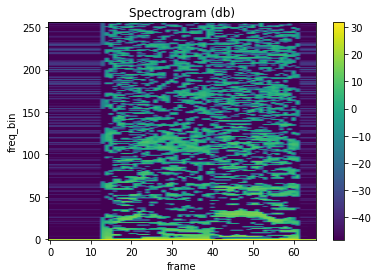

In [7]:
n_fft = 2048
win_length = None
hop_length = 512
n_mels = 256
n_mfcc = 256

mfcc_transform = audio.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc,
    melkwargs={
        "n_fft": n_fft,
        "win_length": n_fft,
        "f_min": 0.0,
        "f_max": sample_rate // 2,
        "pad": 0,
        "pad_mode": audio.BorderType.REFLECT,
        "power": 2.0,
        "n_mels": n_mels,
        "normalized": False,
        "center": True,
        "onesided": True,
        "window": audio.WindowType.HANN,
        "hop_length": hop_length,
        "norm": audio.NormType.NONE,
        "mel_scale": audio.MelType.HTK,
    },
)

mfcc = mfcc_transform(waveform)
plot_spectrogram(mfcc)

## LFCC

[mindspore.dataset.audio.LFCC](https://mindspore.cn/docs/zh-CN/master/api_python/dataset_audio/mindspore.dataset.audio.LFCC.html#mindspore.dataset.audio.LFCC) 可以计算音频信号的线性频率倒谱系数。


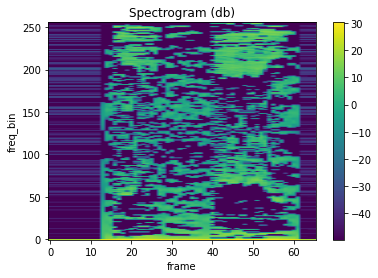

In [8]:
n_fft = 2048
win_length = None
hop_length = 512
n_lfcc = 256

lfcc_transform = audio.LFCC(
    sample_rate=sample_rate,
    n_lfcc=n_lfcc,
    speckwargs={
        "n_fft": n_fft,
        "win_length": n_fft,
        "hop_length": hop_length,
        "pad": 0,
        "window": audio.WindowType.HANN,
        "power": 2.0,
        "normalized": False,
        "center": True,
        "pad_mode": audio.BorderType.REFLECT,
        "onesided": True
    },
)

lfcc = lfcc_transform(waveform)
plot_spectrogram(lfcc)

## 在数据Pipeline中加载和处理图像文件

使用 [mindspore.dataset.GeneratorDataset](https://mindspore.cn/docs/zh-CN/master/api_python/dataset/mindspore.dataset.GeneratorDataset.html#mindspore.dataset.GeneratorDataset) 将磁盘中的音频文件内容加载到数据Pipeline中，并进一步应用其他增强操作。

number of samples in dataset: 3
>>>>> after gain


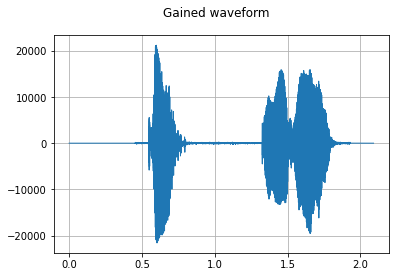

In [9]:
import scipy.io.wavfile as wavfile
import mindspore.dataset as ds
import mindspore.dataset.audio as audio

# Define dataloader
class DataLoader():
    def __init__(self):
        self.sample_rate, self.wave = wavfile.read("84-121123-0000.wav")
    def __next__(self):
        return next(self.data)
    def __iter__(self):
        self.data = iter([(self.wave, self.sample_rate), (self.wave, self.sample_rate), (self.wave, self.sample_rate)])
        return self

# Load 3 waveforms into dataset pipeline
dataset = ds.GeneratorDataset(DataLoader(), column_names=["wav", "sample_rate"], shuffle=False)

# check the sample numbers in dataset
print("number of samples in dataset:", dataset.get_dataset_size())

# apply gain on "wav" column
dataset = dataset.map(audio.Gain(gain_db=3.0), input_columns=["wav"])

# check results, specify the output type to NumPy for drawing
print(">>>>> after gain")
for waveform, sample_rate  in dataset.create_tuple_iterator(output_numpy=True):
    # show the wav
    plot_waveform(waveform, sample_rate, title="Gained waveform")
    # after drawing one wav, break
    break